<a href="https://colab.research.google.com/github/Augusta02/Machine-Learning-Projects/blob/main/Aggolomerative_Clustering_and_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from google.colab import files
uploaded= files.upload()

Saving CC.csv to CC.csv


In [4]:
import io
data_cc= pd.read_csv(io.BytesIO(uploaded['CC.csv']))
data_cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data_cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [16]:
data_cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    308
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [17]:
data_cc.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [18]:
data_cc['MINIMUM_PAYMENTS'].fillna(data_cc['MINIMUM_PAYMENTS'].median(), inplace=True)

In [19]:
data=data_cc.drop("CUST_ID", axis=1)

In [20]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [21]:
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data) 
  

In [22]:
normalized_data = normalize(scaled_data)

In [23]:
normalized_data = pd.DataFrame(normalized_data) 

In [24]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(X_principal)

In [27]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative


,0
0,0
1,2
2,1
3,0
4,0
...,...
8863,0
8864,0
8865,0
8866,0


In [28]:
import matplotlib.pyplot as plt

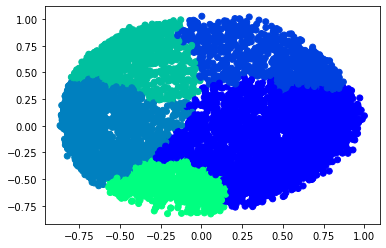

In [30]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 5).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()

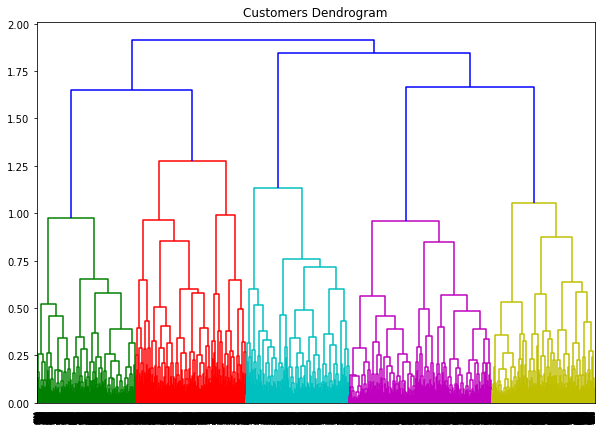

In [31]:

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customers Dendrogram")
dend=shc.dendrogram(shc.linkage(X_principal, method="complete"))

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans=KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_principal)

KMeans(n_clusters=4, random_state=0)

In [35]:
labels=kmeans.labels_
labels

array([2, 1, 0, ..., 3, 2, 1], dtype=int32)

In [36]:
clusters = pd.concat([data, pd.DataFrame({"cluster":labels})], axis=1)

In [37]:
pca = PCA(2)
principalComponents = pca.fit_transform(normalized_data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)
colors = {0: "red", 1: "blue", 2: "green", 3: "yellow"}

(8868, 2)


In [38]:
final_data = pd.DataFrame({"x": x, "y":y, "label":labels})
groups = final_data.groupby(labels)

In [39]:
kmeans.predict(X_principal)
print(kmeans.cluster_centers_)

[[ 0.56991798  0.33292572]
 [-0.43978162  0.51601424]
 [-0.48010438 -0.29311887]
 [ 0.42076276 -0.32153025]]


In [40]:
sum_of_squared_distances = []
K= range (1,15)
for k in K:
    km= KMeans(n_clusters=k)
    km=km.fit(final_data)
    sum_of_squared_distances.append(km.inertia_)
print(sum_of_squared_distances)

[14865.402485046729, 5150.019050526754, 2717.27699807909, 922.808064036062, 786.4626488839673, 675.6866149208525, 568.6277438255195, 466.9816096000684, 423.94446756814017, 385.496362499592, 342.9156816132223, 310.0412010582429, 283.7046230782721, 261.75748477407717]


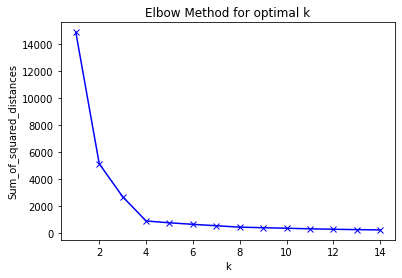

In [41]:
plt.plot(K, sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method for optimal k")
plt.show()

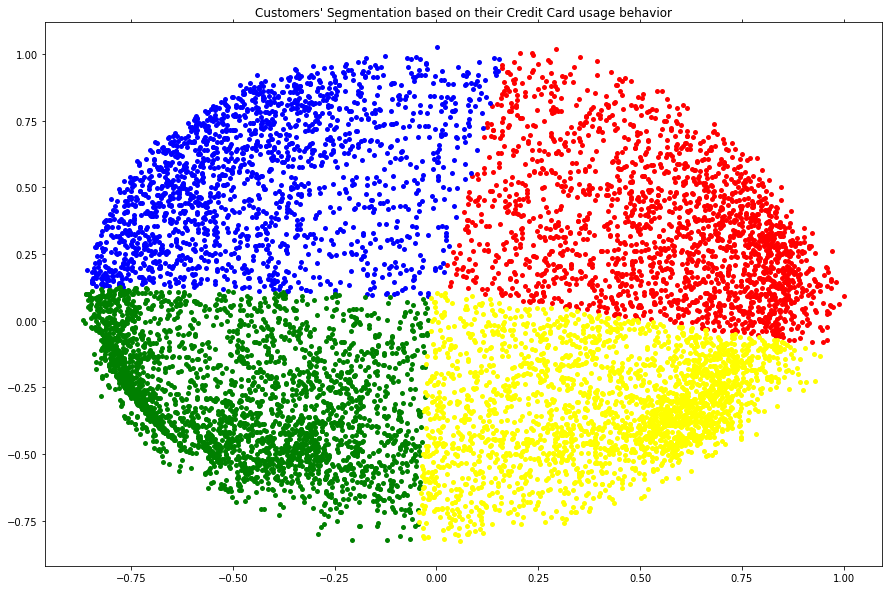

In [42]:
fig, ax = plt.subplots(figsize=(15, 10))
for name, group in groups:
  ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
  ax.set_aspect('auto')
  ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
  ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.set_title("Customers' Segmentation based on their Credit Card usage behavior")
plt.show()

In [43]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [44]:
print(f'Davies-Bouldin index = {davies_bouldin_score(X_principal, labels)}')
print(f'Silhouette Score = {silhouette_score(X_principal, labels)}')

Davies-Bouldin index = 0.8110300490295965
Silhouette Score = 0.4261708054721251


In [45]:
print(f'Davies-Bouldin index = {davies_bouldin_score(final_data, labels)}')
print(f'Silhouette Score = {silhouette_score(final_data, labels)}')

Davies-Bouldin index = 0.4487775315146908
Silhouette Score = 0.6987498994023434
